# Introduction Python III: portfolio optimisation

In this notebook, we learn some basic optimisation techniques. We illustrate our example with (simple) portfolio optimisation. 

To get the data for the market, we use the import function from `yfinance`.

If you do not have the package `yfinance`, please run in a Terminal (for Mac and Linux users, if you have Windows, open an *Anaconda Prompt* or the command prompt)
`
pip install yfinance
`

You should then quit Jupyter and relaunch everything.


In [41]:
%pylab inline
import pandas as pd
import yfinance as yf

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/David/Library/Python/3.11/lib/python/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['mean', 'cov']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## 1/ Load data

We are interested in the following assets: 
- Apple (AAPL)
- Microsoft (MSFT)
- Nvidia (NVDA) 
- Amazon (AMZN)
- Alphabet (GOOGL)
- Tesla (TSLA)
- S&P 500 Index (^GSPC)
- CAC40 (^FCHI)

We load the data from 2023 (the Open Position price for instance). 


In [152]:
assets = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOGL', 'TSLA', '^GSPC', '^FCHI']

Nassets = len(assets)

start_date = '2023-01-03' 
end_date = '2024-01-01' 

df_global = yf.download(assets, start=start_date, end=end_date)['Open']

[*********************100%***********************]  8 of 8 completed


Let us have a look at our Dataframe.

In [153]:
df_global.head(10)

AAPL       AMZN      GOOGL        MSFT    NVDA        TSLA   
Date                                                                           
2023-01-03  130.279999  85.459999  89.589996  243.080002  14.851  118.470001  \
2023-01-04  126.889999  86.550003  90.349998  232.279999  14.567  109.110001   
2023-01-05  127.129997  85.330002  87.470001  227.199997  14.491  110.510002   
2023-01-06  126.010002  83.029999  86.790001  223.000000  14.474  103.000000   
2023-01-09  130.470001  87.459999  88.360001  226.449997  15.284  118.959999   
2023-01-10  130.259995  87.570000  85.980003  227.759995  15.507  121.070000   
2023-01-11  131.250000  90.930000  89.180000  231.289993  15.840  122.089996   
2023-01-12  133.880005  96.930000  91.480003  235.259995  16.100  122.559998   
2023-01-13  132.029999  94.180000  90.849998  237.000000  16.278  116.550003   
2023-01-16         NaN        NaN        NaN         NaN     NaN         NaN   

                  ^FCHI        ^GSPC  
Date                                  
2023-01-03  6580.089844  3853.290039  
2023-01-04  6660.600098  3840.360107  
2023-01-05  6744.500000  3839.739990  
2023-01-06  6772.939941  3823.370117  
2023-01-09  6861.589844  3910.820068  
2023-01-10  6882.009766  3888.570068  
2023-01-11  6879.100098  3932.350098  
2023-01-12  6947.339844  3977.570068  
2023-01-13  6989.589844  3960.600098  
2023-01-16  7036.479980          NaN

**Exercice**: How many days are there in the table? Is it normal?

**Exercice**: Plot the evolution of the market

there are 257 opened days in the market (no market on week-ends)


<Axes: xlabel='Date'>

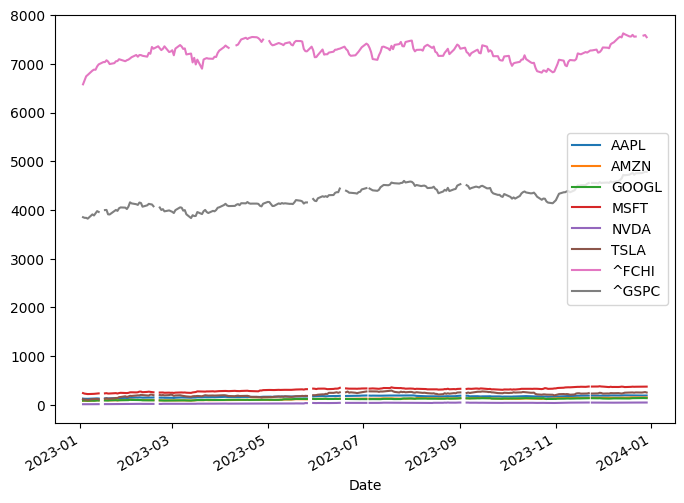

In [154]:
print("there are {} opened days in the market (no market on week-ends)".format(len(df_global)))

figsize(8, 6)
df_global.plot()

The assets are not normalized It is a good idea to normalize by the initial prize.

<Axes: xlabel='Date'>

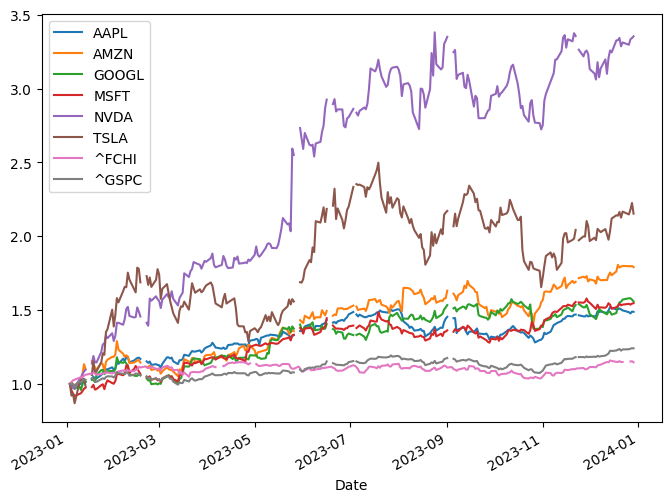

In [155]:
df_normalized = df_global/df_global.iloc[0, :]
df_normalized.head()
df_normalized.plot()

## 2. ultra-basic portfolio theory

An asset $i$ can be seen as a random variable $X_i$, corresponding to the *capital gain per day*. We can define
- the average $r_i = \mathbb{E}[X_i]$
- the covariance matrix $C = (c_{ij})$ with $C_{ij} := \mathbb{E}[ (X_i - r_i)(X_j - r_j) ]$

mean = 
AAPL     0.002084
AMZN     0.003007
GOOGL    0.002429
MSFT     0.002461
NVDA     0.010023
TSLA     0.004278
^FCHI    0.000563
^GSPC    0.000983
dtype: float64

covariance = 
           AAPL      AMZN     GOOGL      MSFT      NVDA      TSLA     ^FCHI   
AAPL   0.000287  0.000186  0.000172  0.000156  0.000583  0.000522  0.000046  \
AMZN   0.000186  0.000809  0.000349  0.000280  0.000861  0.000764  0.000051   
GOOGL  0.000172  0.000349  0.000557  0.000212  0.000799  0.000520  0.000030   
MSFT   0.000156  0.000280  0.000212  0.000386  0.000787  0.000542  0.000030   
NVDA   0.000583  0.000861  0.000799  0.000787  0.005741  0.002152  0.000132   
TSLA   0.000522  0.000764  0.000520  0.000542  0.002152  0.004380  0.000203   
^FCHI  0.000046  0.000051  0.000030  0.000030  0.000132  0.000203  0.000084   
^GSPC  0.000100  0.000147  0.000113  0.000112  0.000351  0.000345  0.000039   

          ^GSPC  
AAPL   0.000100  
AMZN   0.000147  
GOOGL  0.000113  
MSFT   0.000112  
NVDA   0.000351 

<Axes: xlabel='Date'>

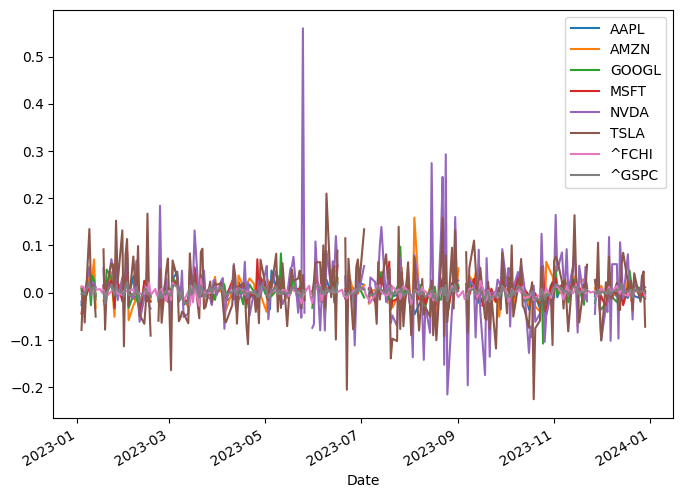

In [156]:
df_diff = df_normalized.diff() # daily returns, normalised by the initial price

mean = df_diff.mean() # the mean 
cov = df_diff.cov() # the covariance matrix

print("mean = \n{}".format(mean))
print("\ncovariance = \n{}".format(cov))

df_diff.plot()

Let $N$ be the number of assets. A *strategy* is a vector $w = (w_1, \cdots, w_N)$ with $0 \le w_i \le 1$ and $\sum_i w_i = 1$. The weight $w_i$ corresponds the proportion of asset $i$ in our portfolio.

The goal is to find the best strategy, that is the best vector $W$. There are several criteria for that, that we detail now.

The *gain* of a strategy is $G(W) := \sum_{i=1}^n w_i r_i$.

The *risk* of a strategy is $R(W) := w^T C w$.

In practice, we want the highest gain, with the minimum risk.

**Exercice**: Draw $M = 10000$ strategies at random, and scatter plot the corresponding gains as a function of the risk.

In [157]:
N, M = shape(df_diff)[1], 10000

def gain(w): return dot(mean, w)
def risk(w): return w.T@cov@w

G, R = [], []

W = zeros((N,M)) # to record the values

for m in range(M):
    w = abs( rand(N) ) # positive values
    w /= sum(w) # normalisation
    W[:,m] = w
    G.append( gain(w) )
    R.append( risk(w) )

Text(0, 0.5, 'gain')

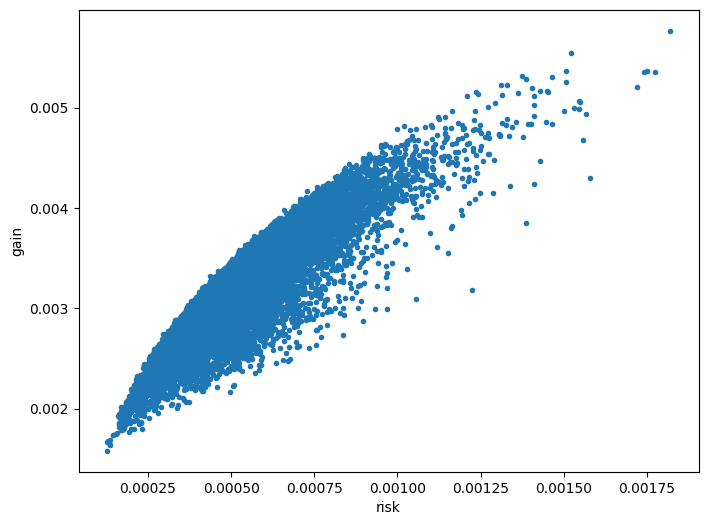

In [158]:
plot(R, G, '.')
xlabel("risk")
ylabel("gain")

**Exercice**: According to your plot, for a risk 0.0005, what is the highest gain one can expect?

**Exercice:** With a daily gain of 0.003%, what is my yearly gain? (Remember that there are only 252 market days per year)

In [159]:
def from_daily_to_yearly (daily_gain):
    return (1 + daily_gain)**252 - 1

daily_gain = 0.003
print("With a daily_gain of {:.2f}%, the yearly gain is {:.2f}%".format(100*0.003, 100*from_daily_to_yearly(0.003)))

With a daily_gain of 0.30%, the yearly gain is 112.73%


## 2. Optimisation of the Sharpe's ratio

In this section, we look for a simple criterion to optimise. We try to optimise the **Sharpe's ratio**

$$ S(W) := \frac{G(W)}{\sqrt{R(W)}}.$$

**Exercice**: On the random portfolios you draw in the last question, which one has the best Sharpe's ratio? What is the corresponding ratio? Place this point in the previous plot.

In [160]:
# Your code here

In [161]:
# Solution
Sharpe = array(G)/sqrt(array(R))
imax = argmax(Sharpe)

Wopt = W[:,imax]

print("The best Sharpe's ratio is S = {}\n\t obtained for the strategy {}.".format(Sharpe[imax], Wopt))
print("The risk is {}, and the gain is {}?".format(R[imax], G[imax]))

The best Sharpe's ratio is S = 0.1592348833902184
	 obtained for the strategy [0.24309786 0.10611925 0.00892366 0.24872801 0.10897901 0.00345167
 0.23985338 0.04084718].
The risk is 0.0002964182260196713, and the gain is 0.0027415152503195215?


Text(0.5, 1.0, "Best portfolio, with Sharpe's ratio = 0.159235")

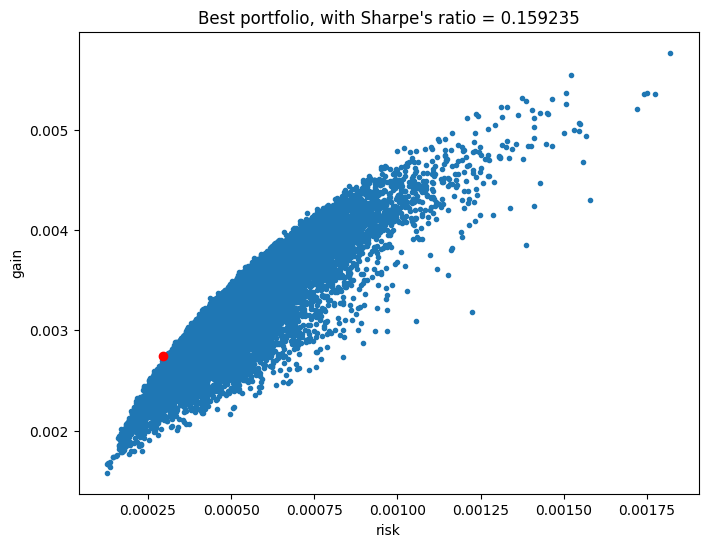

In [162]:
plot(R, G, '.')
xlabel("risk")
ylabel("gain")
plot(R[imax], G[imax], 'or')
title("Best portfolio, with Sharpe's ratio = {:.6f}".format(Sharpe[imax]))

Let us now find the optimum with a concrete algorithm.

**Exercice**: Prove that there is $r \in \mathbb{R}^n$ and $C \in \mathcal{M}(\mathbb{R})$ so that
$$
    S(w) = \dfrac{r^T w}{\sqrt{w^T C w}}, \quad \text{and that} \quad
    \nabla_w S (w) = \dfrac{r}{\sqrt{w^T C w}} - \dfrac{(r^Tw) Cw}{2 (w^T C w)^{3/2}}.
$$
Code these functions as `S` and `dS` respectively.



In [163]:
r = array(mean)
C = array(cov)

def S(w): return dot(r, w)/sqrt(w.T@C@w)

def dS(w): return r/sqrt(w.T@C@w) - dot(r,w)/(w.T@C@w)**(3/2) * C@w

We use a simple gradient ascent to find the optimum. Recall that this sequence is defined by
$$
    w_{n+1} = w_n + \alpha \nabla S (w_n).
$$
**Exercice**: Find the optimal strategy with the gradient descente. Take $\alpha = 0.5$ and $w_0$ at random

**WARNING**: No while loops!

In [164]:
wn = rand(N)
alpha = 0.5

for n in range(100): # 1000 iterations MAX
    dSn = dS(wn)
    if norm(dSn) < 1e-6:
        print("Done")
        break
    wn = wn + alpha*dS(wn)
    
    if n%10 == 0:
        print("Iteration n = {:3}, Sharpe = {:7.4f}, norm gradient = {:f}".format(n, S(wn), norm(dSn)))   
        
wbest = wn

Iteration n =   0, Sharpe =  0.1422, norm gradient = 0.039079
Iteration n =  10, Sharpe =  0.1483, norm gradient = 0.032037
Iteration n =  20, Sharpe =  0.1524, norm gradient = 0.026049
Iteration n =  30, Sharpe =  0.1550, norm gradient = 0.020307
Iteration n =  40, Sharpe =  0.1565, norm gradient = 0.015169
Iteration n =  50, Sharpe =  0.1574, norm gradient = 0.011460
Iteration n =  60, Sharpe =  0.1579, norm gradient = 0.009415
Iteration n =  70, Sharpe =  0.1583, norm gradient = 0.008469
Iteration n =  80, Sharpe =  0.1586, norm gradient = 0.007988
Iteration n =  90, Sharpe =  0.1589, norm gradient = 0.007656


**Exercice** Create a nice Series for the best portfolio you have found, and plot it with bars

Text(0.5, 1.0, "Portfolio with Sharpe's constant = 0.159174")

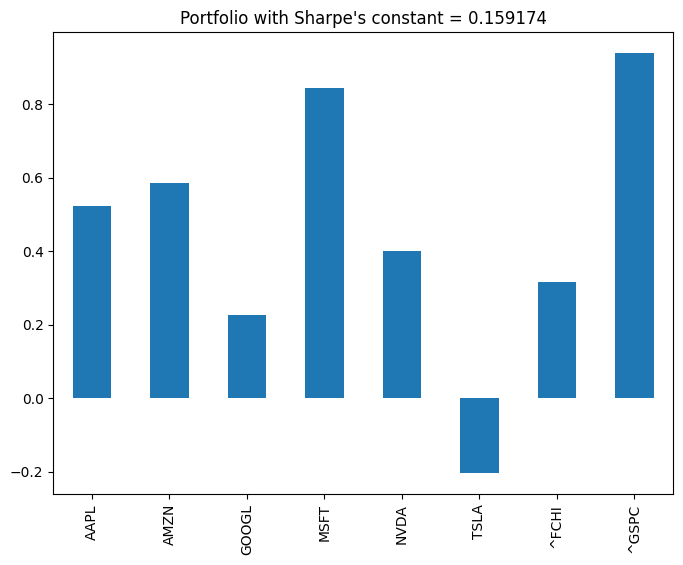

In [165]:
best_portfolio = pd.Series(wbest, index=df.columns)
best_portfolio.plot(kind='bar')

title("Portfolio with Sharpe's constant = {:.6f}".format(S(wbest)))

In practice, one can use an optimisation function from Python. These are given in the scipy package. See the doc [here](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html). 

If you can, always choose the BFGS method.

In [166]:
import scipy.optimize as optimize

best value found = 0.166711


Text(0.5, 1.0, "Portfolio with Sharpe's constant = 0.166711")

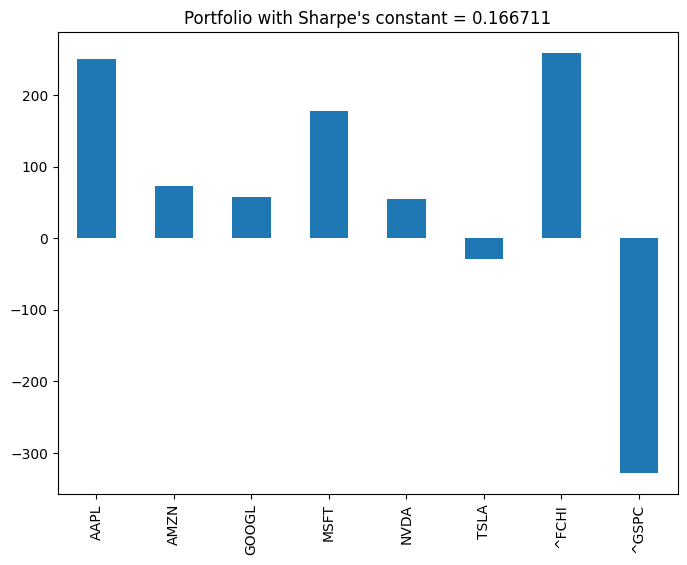

In [168]:
w0 = rand(N)

def mS(w): return -S(w) # to maximize S is to minimize -S

res = optimize.minimize(mS, w0, method="BFGS")
wbest = res.x

print("best value found = {:.6f}".format(-res.fun))
best_portfolio = pd.Series(wbest, index=df.columns)
best_portfolio.plot(kind='bar')

title("Portfolio with Sharpe's constant = {:.6f}".format(-res.fun))

## 3. Optimisation with constraints

Your best portfolio has a problem: it has negative values, it has values bigger than $1$, and the sum is not $1$...

Hopefully, one can tell the minimize function of scipy that we want $w$ to satisfies some bounds and/or constraints.

**Exercice**: find the best portfolio with $w \in [0, 1]^N$ and $\sum w_i = 1$.

*Hint: read the documentation for optimize.minimize*

In [169]:
# your code here

Check constraint. Must be 1: 1.000000
best value found = 0.1608133285212858


<Axes: >

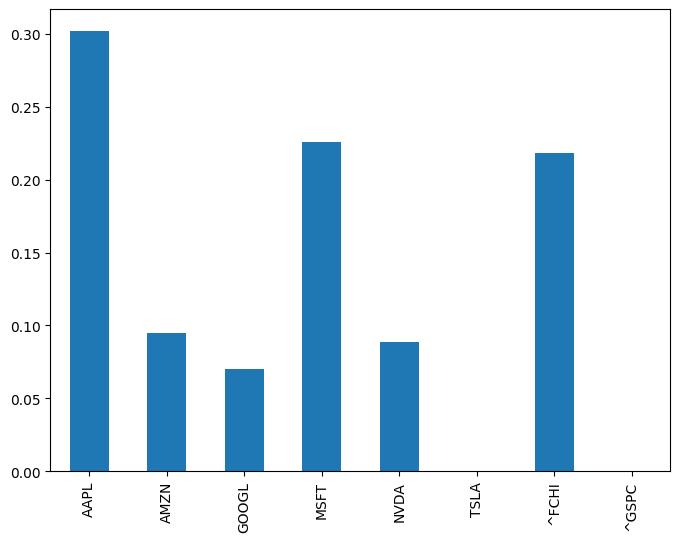

In [170]:
bounds = optimize.Bounds([0]*Nassets, [1]*Nassets) # w is between 0 and 1
constraint = optimize.LinearConstraint(ones(Nassets), 1, 1) # constraint \sum w_i = 1


res = optimize.minimize(mS, w0, bounds=bounds, constraints = constraint)
wbest = res.x

print("Check constraint. Must be 1: {:.6f}".format(sum(wbest)))
print("best value found = {}".format(-res.fun))

best_portfolio = pd.Series(wbest, index=df_normalized.columns)
best_portfolio.plot(kind='bar')

Let us plot the evolution of this portfolio over the year

<Axes: xlabel='Date'>

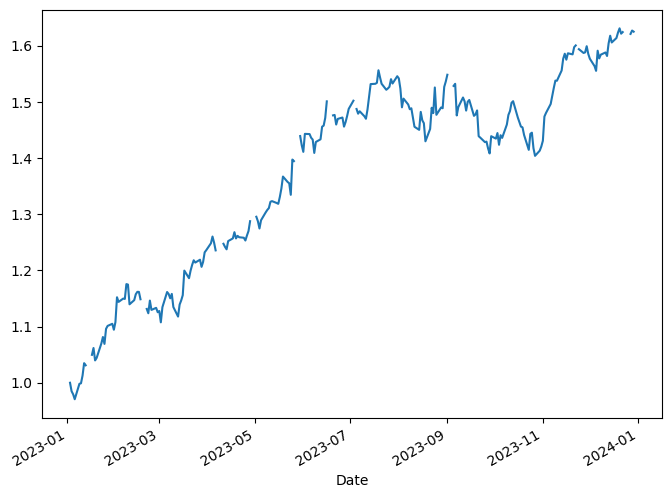

In [171]:
portfolio_evolution = df_normalized @ best_portfolio
evolution_portfolio.plot()

**Exercice:** What is the daily gain and the risk of this portfolio?

In [173]:
print("The best portfolio gives a daily gain of {:.2f}%, a risk of {:.6f}, and a yearly gain of {:.2f}%".format(100*gain(wbest), risk(wbest), 100*from_daily_to_yearly(100*gain(wbest))))

The best portfolio gives a daily gain of 0.27%, a risk of 0.000272, and a yearly gain of 94.91%


Is this portfolio also good for 2024?

In [147]:
# download new year data
start_date = '2024-01-01' 
end_date = '2024-09-01' # ends at september first

df_global_newYear = yf.download(assets, start=start_date, end=end_date)['Open']

[*********************100%***********************]  8 of 8 completed


<Axes: xlabel='Date'>

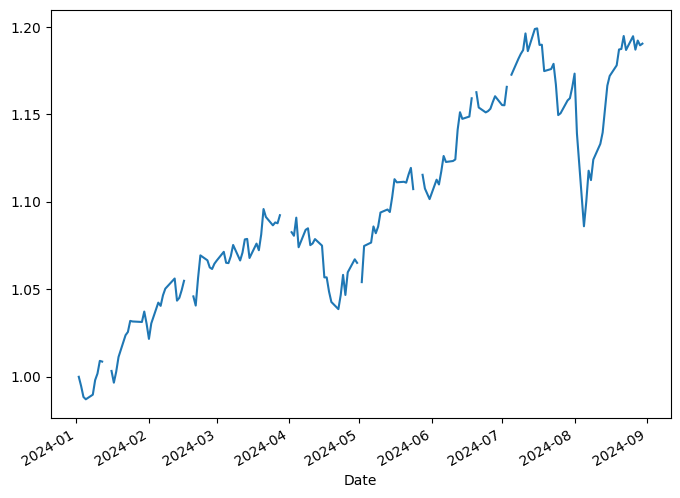

In [148]:
df_normalized_newYear = df_global_newYear/df_global_newYear.iloc[0, :]
portfolio_evolution_newYear = df_normalized_newYear @ best_portfolio

portfolio_evolution_newYear.plot()

## 4. Optimisation of the gain

We now look for a better criterion than Sharpe's ratio. We would like to have the highest possible gain with a maximum risk allowed.


**Exercice** Write a function which returns the best portfolio with maximum risk `maxRsk`. You can use `scipy.optimize`.

In [149]:
# your code here

In [150]:
def mgain(w): return -gain(w) # minus the gain
    
def get_best_portfolio(maxRsk, w0 = rand(Nassets)):
    # returns the best portfolio for a given risk
    bounds = optimize.Bounds([0]*Nassets, [1]*Nassets) # w is between 0 and 1
    
    # We create a tuple of dictionnaries for the constraints
    cons1 = optimize.LinearConstraint(ones(Nassets), 1, 1) # sum(w_i) = 1
    cons2 = optimize.NonlinearConstraint(risk, -np.inf, maxRsk) # risk <= maxRsk
    
    # We maximize Gain, so we minimize -Gain
    res = optimize.minimize(mgain, w0, bounds = bounds, constraints = (cons1, cons2) )
    return pd.Series(res.x, index = df_global.columns)

# Check
rsk = 0.0002
wbest2 = get_best_portfolio(rsk)

print("Check constraint. Must be 1: {:.6f}".format(sum(wbest2)))
print("Risk = {:.6f}, Gain = {:.6f}".format(risk(wbest2), gain(wbest2)))


Check constraint. Must be 1: 1.000000
Risk = 0.000200, Gain = 0.001466


**Exercice**: Compute the best portfolios for a range of maxRsk, and display the results nicely.

In [121]:
RR = linspace(1e-6, 0.0015, 100) # Range of risks

list_portfolios = []
list_gains = []

wbest = rand(Nassets) # Initial guess

# Compute everything
for r in RR:
    # For the initial guess of the next computation, we take the best portfolio of the previous.
    wbest = get_best_portfolio(r, w0 = wbest)
    
    list_portfolios.append(wbest)
    list_gains.append( gain(wbest) )

Text(0.5, 0, 'Risk')

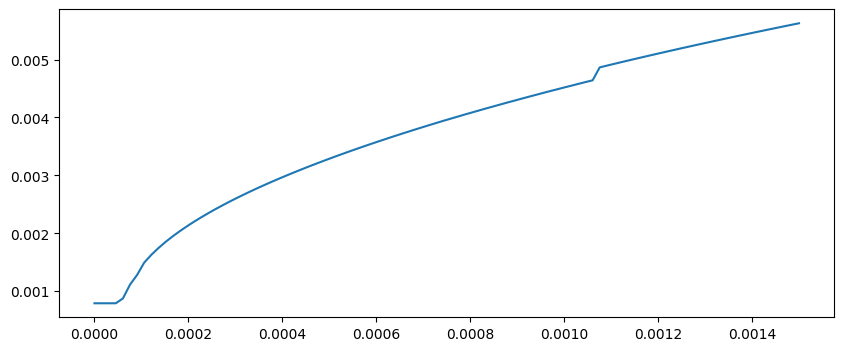

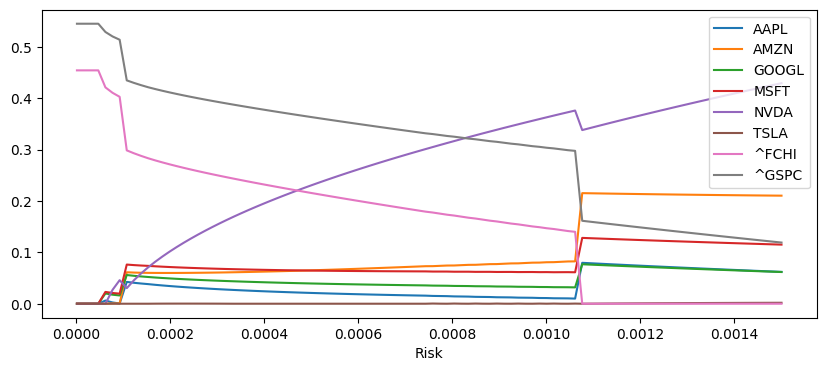

In [122]:
# In another cell (to not repeat the computation), display the result

# record the result in a Dataframe
df_portfolios = pd.DataFrame(list_portfolios, index=RR)

figsize(10, 4)

# plot the gain as a function of risk
plot(RR, list_gains)

# plot the behavior of the portfolios
df_portfolios.plot()
xlabel("Risk")

Text(0, 0.5, 'Gain')

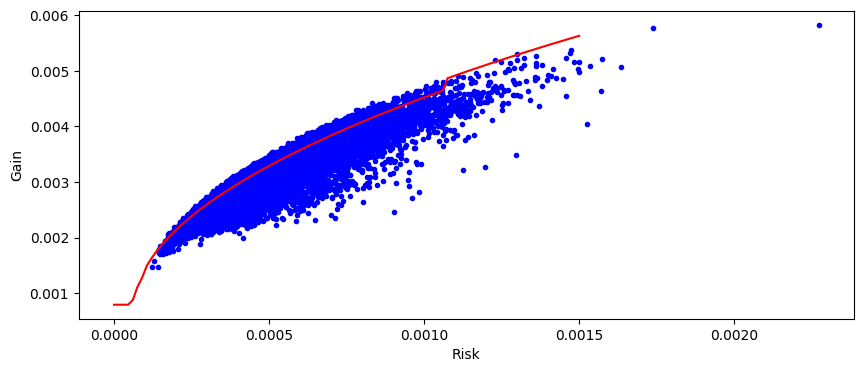

In [123]:
plot(R, G, '.b') # The previous random portfolios
plot(RR, list_gains, 'r') # Our best portfolios
xlabel("Risk")
ylabel("Gain")